<a href="https://colab.research.google.com/github/FiShaughnesy85/gcp-demo/blob/main/ARIMAMyDatal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=-aCF0_wfVwY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   visits  1101 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB
     visits
0  797240.0
1  719241.0
2  700060.0
3  721915.0
4  839776.0


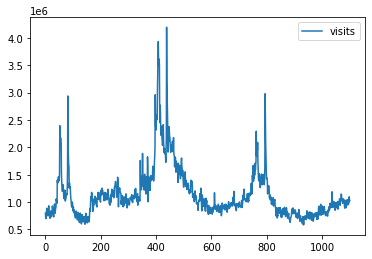

In [3]:
import pandas as pd

df = pd.read_csv('/content/ARIMA visits excl PS5 spike nov 2022 excl BF excl Easter VISITS ONLY.csv')
df.info()
print(df.head())
df.plot()


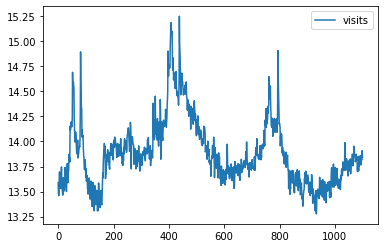

In [4]:
import numpy as np
df = np.log(df) # don't forget to transform the data back when making real predictions

df.plot()

In [5]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

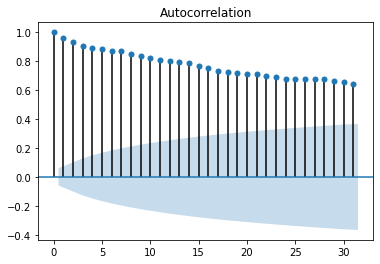

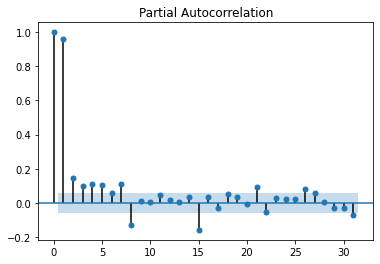

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [7]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.10271360432090132


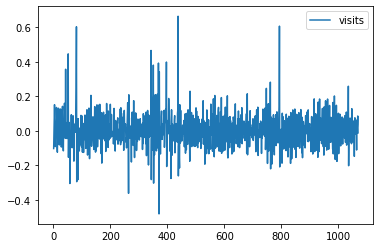

In [8]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()


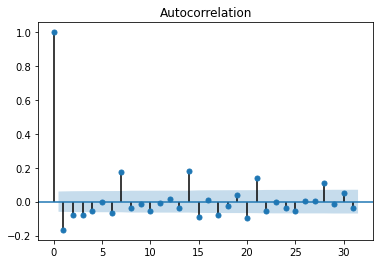

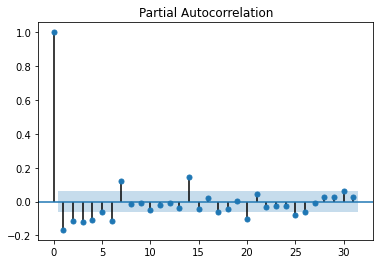

In [9]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [10]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 8.249215251392054e-13


In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0 ))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 visits   No. Observations:                 1071
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1012.966
Date:                Sat, 26 Nov 2022   AIC                          -2019.932
Time:                        20:13:51   BIC                          -2005.006
Sample:                             0   HQIC                         -2014.278
                               - 1071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1861      0.026     -7.241      0.000      -0.237      -0.136
ar.L2         -0.1124      0.027     -4.186      0.000      -0.165      -0.060
sigma2         0.0088      0.000     47.654      0.0

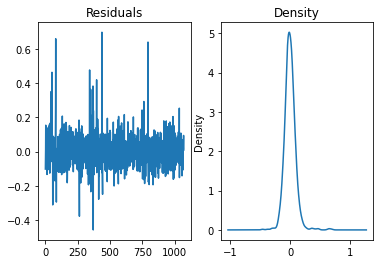

In [20]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

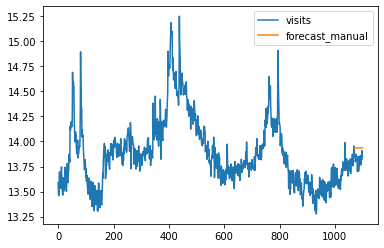

In [21]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

P-value:  0.09668323599104017


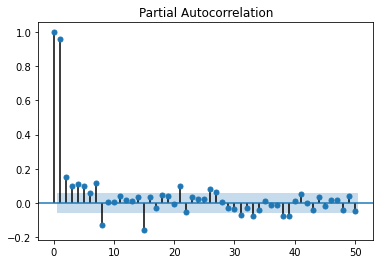

In [22]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['visits'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['visits'], lags=50)